In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy

from torch.utils.data import DataLoader
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#Load data and plot

In [ ]:
data_FPT = pd.read_csv('/content/FPT.csv')
data_MSN = pd.read_csv('/content/MSN.csv')
data_PNJ = pd.read_csv('/content/PNJ.csv')
data_VIC = pd.read_csv('/content/VIC.csv')

In [ ]:
data_FPT

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [ ]:
data_MSN

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
135349,MSN,12/22/2020 14:23,82.8,82.8,82.8,82.8,700,0
135350,MSN,12/22/2020 14:24,82.7,82.8,82.7,82.8,4660,0
135351,MSN,12/22/2020 14:25,82.8,82.8,82.8,82.8,50,0
135352,MSN,12/22/2020 14:27,82.8,82.8,82.8,82.8,300,0


In [ ]:
data_PNJ

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
125304,PNJ,12/22/2020 14:22,78.20,78.20,78.20,78.20,5000,0
125305,PNJ,12/22/2020 14:23,78.20,78.20,78.20,78.20,1700,0
125306,PNJ,12/22/2020 14:24,78.20,78.20,78.20,78.20,870,0
125307,PNJ,12/22/2020 14:25,78.10,78.10,78.10,78.10,13000,0


In [ ]:
data_VIC

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


<Axes: title={'center': 'close fpt'}>

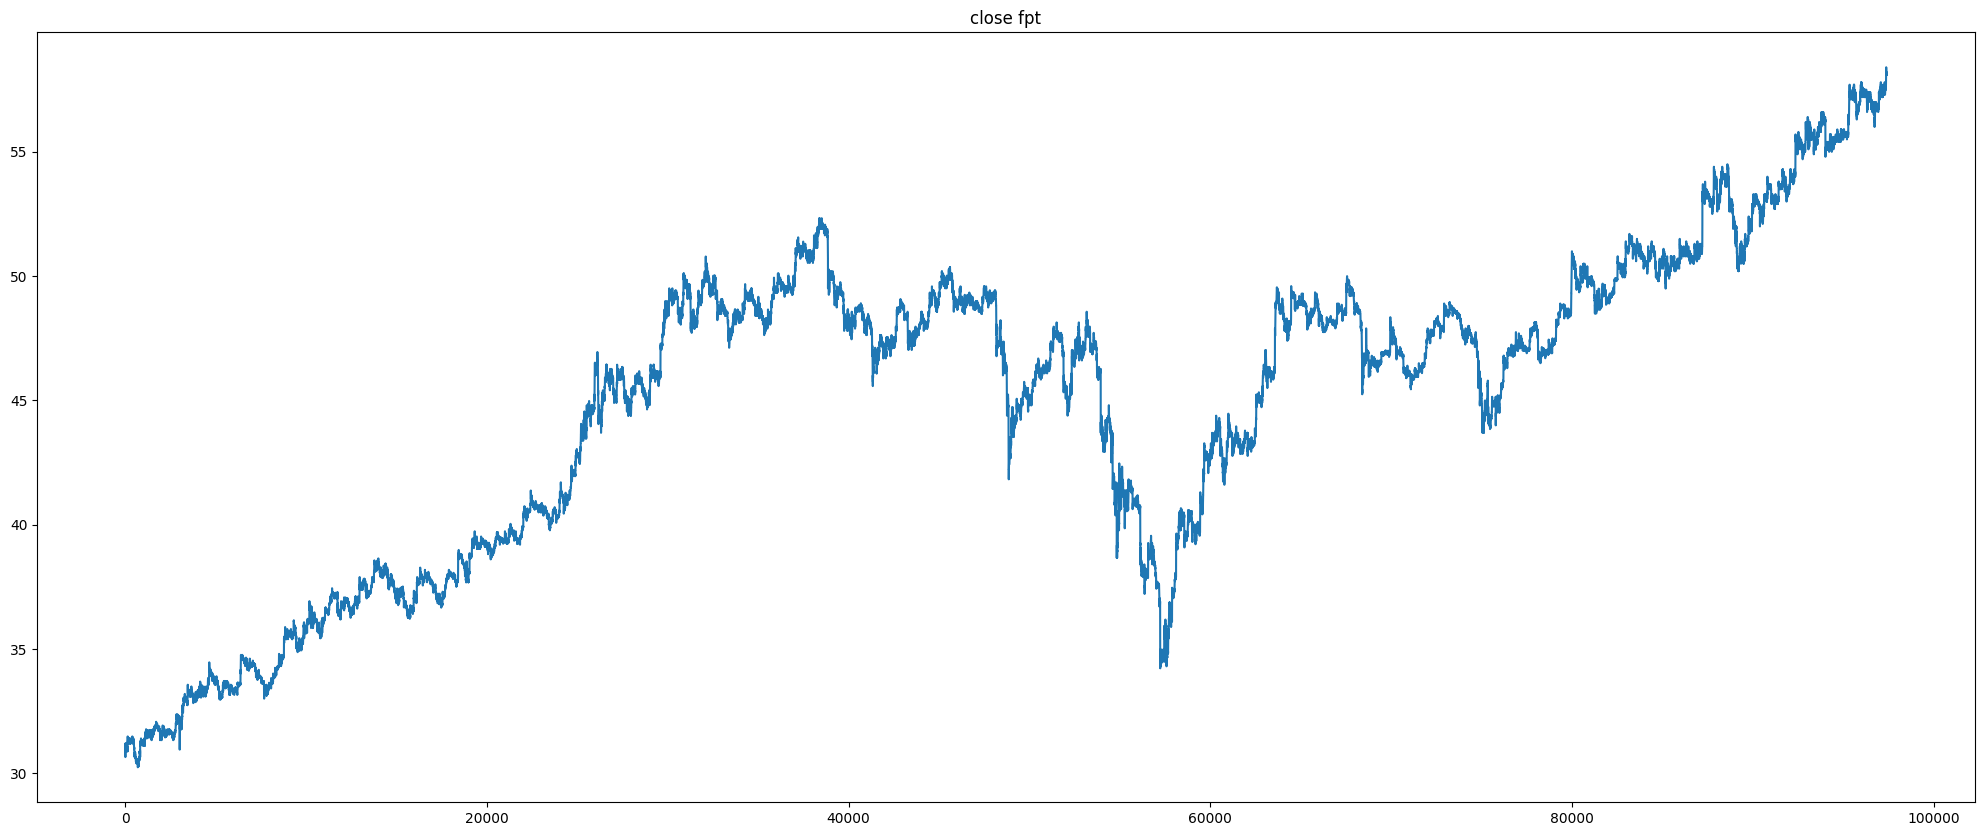

In [ ]:
data_FPT['Close'].plot(label='Close', figsize=(25,10), title ='close fpt')

<Axes: title={'center': 'close MSN'}>

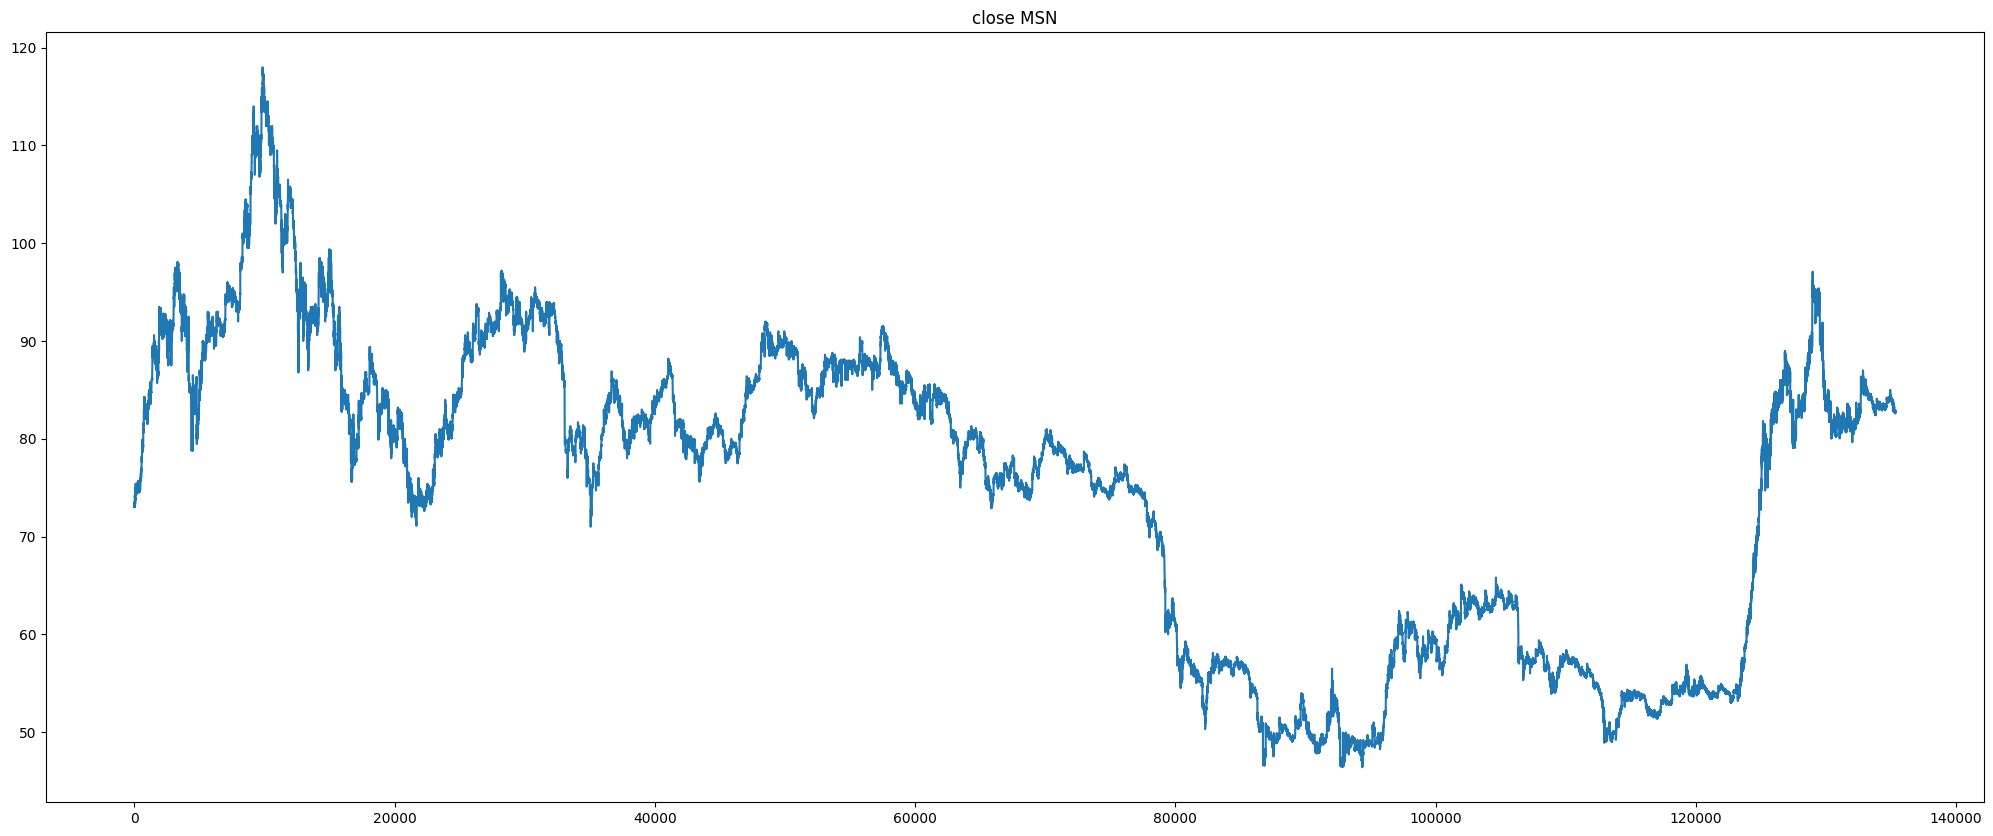

In [ ]:
data_MSN['Close'].plot(label='Close', figsize=(25,10), title ='close MSN')

<Axes: title={'center': 'close PNJ'}>

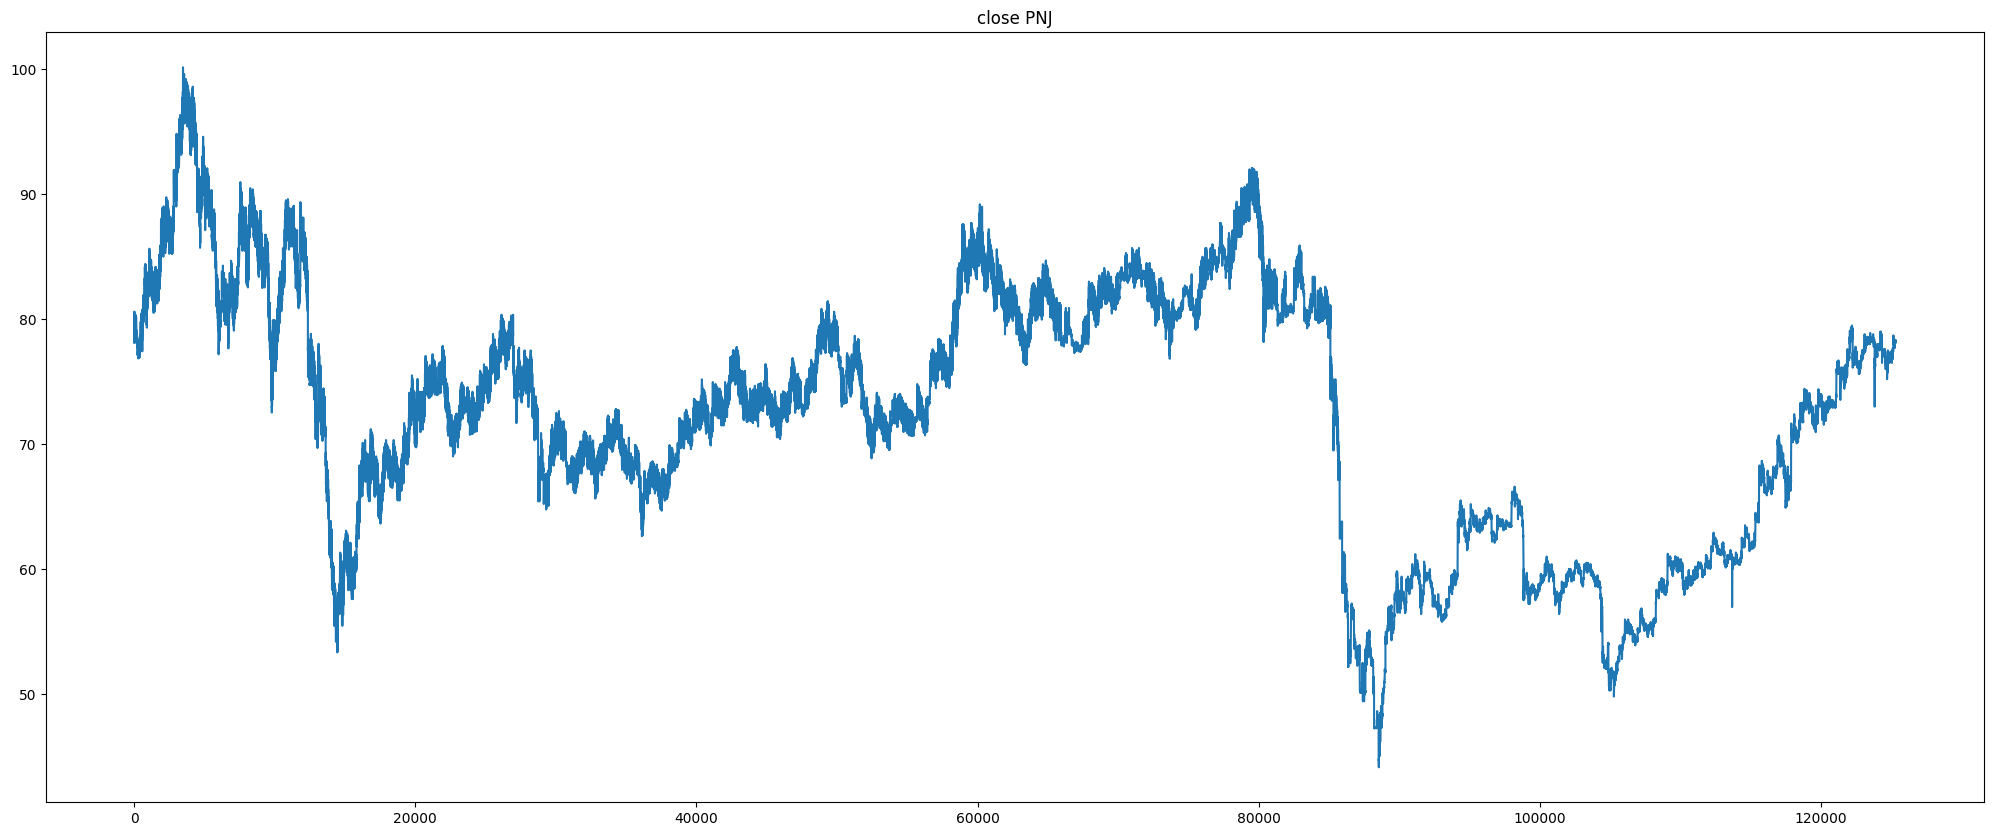

In [ ]:
data_PNJ['Close'].plot(label='Close', figsize=(25,10), title ='close PNJ')

<Axes: title={'center': 'close VIC'}>

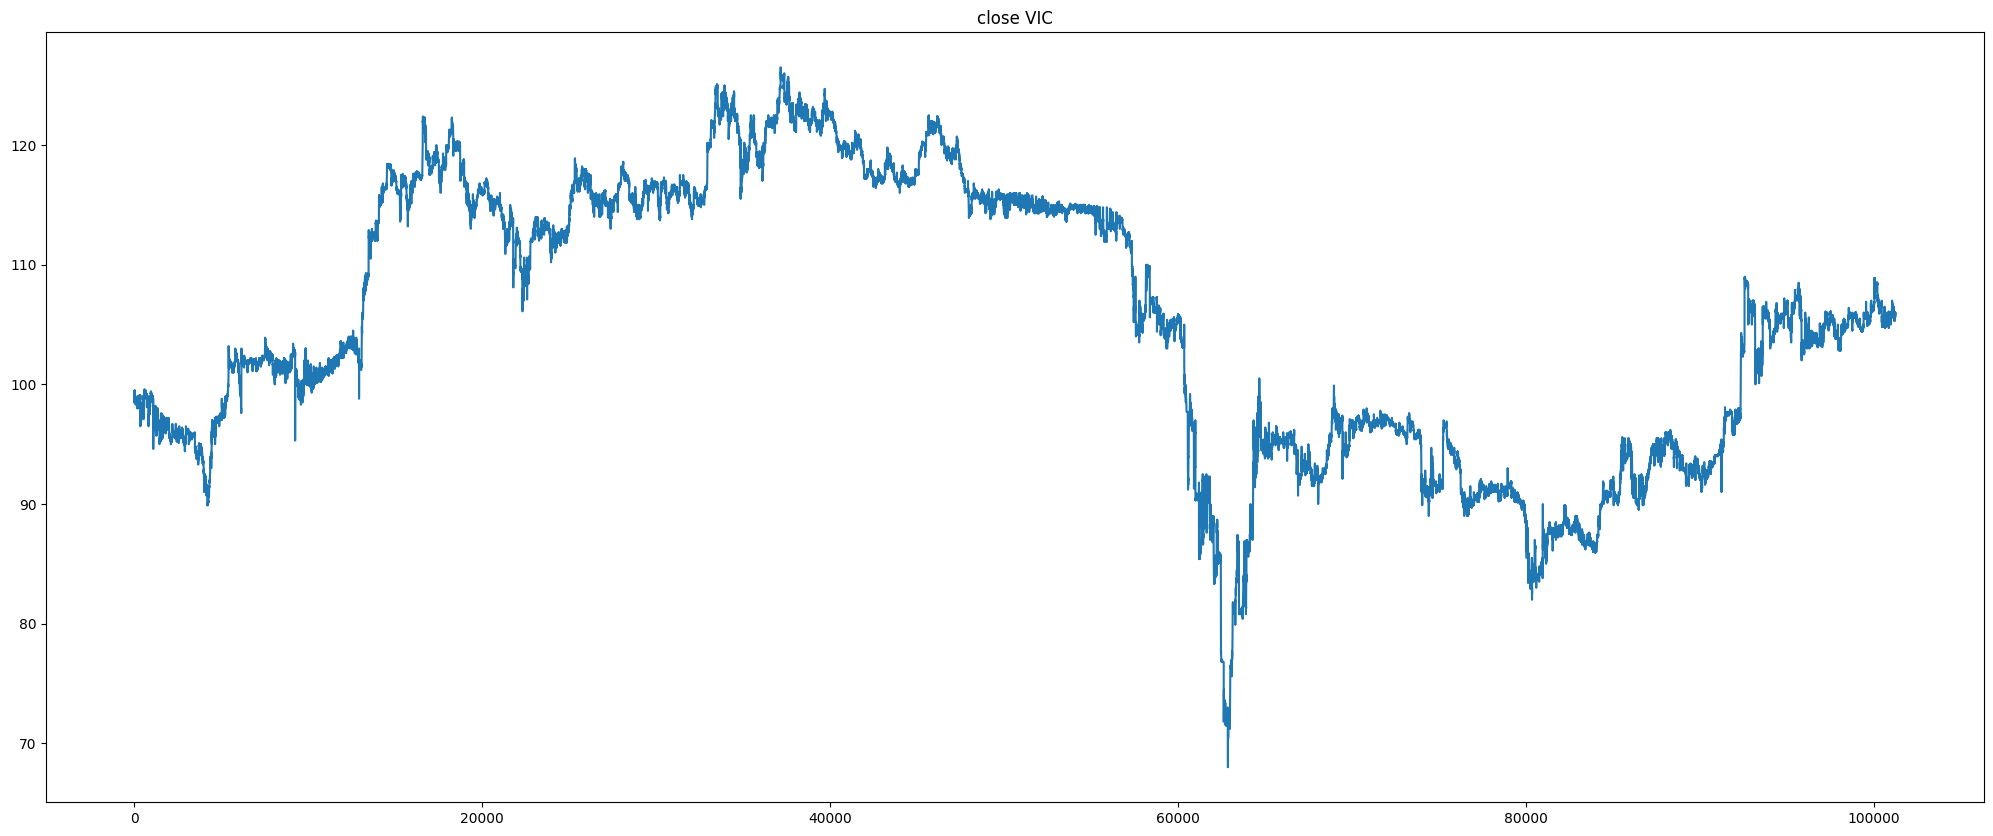

In [ ]:
data_VIC['Close'].plot(label='Close', figsize=(25,10), title ='close VIC')

In [ ]:
print("FPT ")
print(data_FPT.info())
print("MSN ")
print(data_MSN.info())
print("VIC ")
print(data_VIC.info())
print("PNJ ")
print(data_PNJ.info())


FPT 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB
None
MSN 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  flo

# Regression with Linear Regression

In [ ]:

def LinearRegressionStockPrice(data):
  # coppy data
  data_stock = deepcopy(data)
  data_stock.fillna(value=-103, inplace=True)

  # split data
  split_index_stock = int(len(data_stock) * 0.8)
  data_stock = data_stock.drop(['Ticker', 'Date/Time'], 1)
  data_train_stock = data_stock[:split_index_stock]
  data_test_stock = data_stock[split_index_stock:]

  X_train = data_train_stock.drop(['Close'], 1)
  y_train = np.array(data_train_stock['Close'])
  X_test = data_test_stock.drop(['Close'], 1)
  y_test = data_test_stock['Close']

  # train with machine learning
  LinearRegressionFPT = LinearRegression()
  LinearRegressionFPT.fit(X_train, y_train)

  y_pred = LinearRegressionFPT.predict(X_test)
  rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))/ 2
  print("total loss = " + str(rmse))


  plt.figure(figsize=(16,8))
  data_test_stock['Predictions'] = y_pred
  plt.plot(data_train_stock['Close'])
  plt.plot(data_test_stock[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')



<ipython-input-12-ec0bf73034a7>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_stock = data_stock.drop(['Ticker', 'Date/Time'], 1)
<ipython-input-12-ec0bf73034a7>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = data_train_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = data_test_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_stock['

total loss = 0.017230697923718345


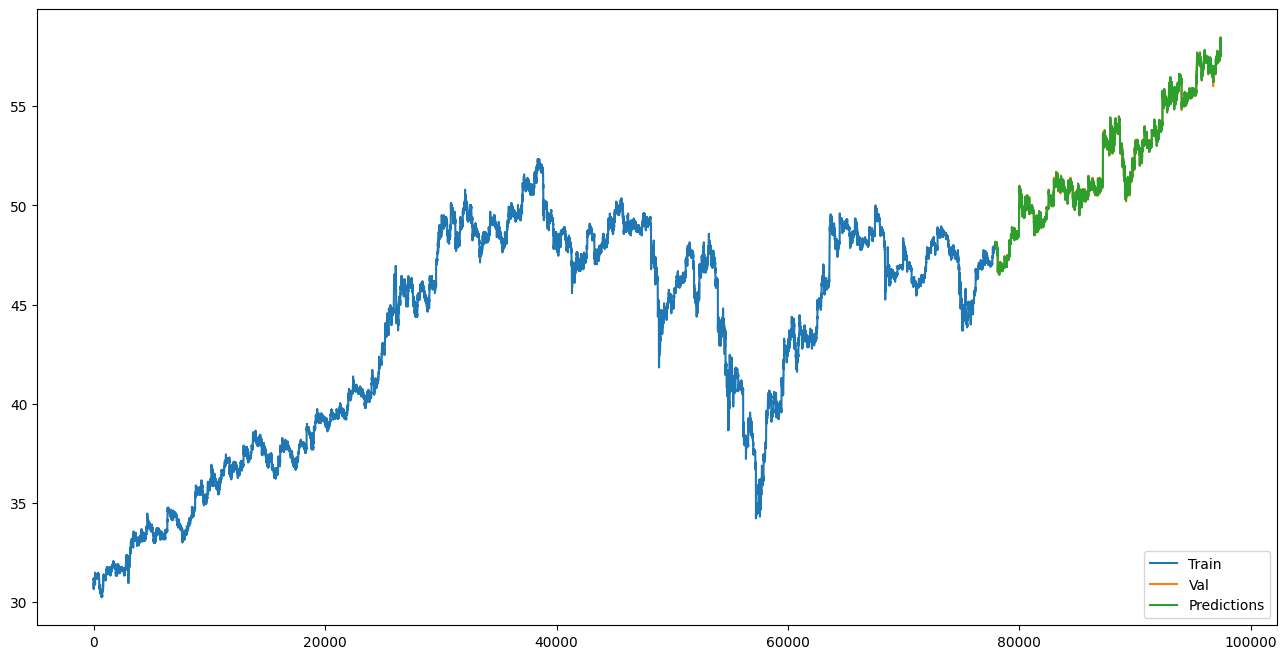

In [ ]:
LinearRegressionStockPrice(data=data_FPT)

<ipython-input-12-ec0bf73034a7>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_stock = data_stock.drop(['Ticker', 'Date/Time'], 1)
<ipython-input-12-ec0bf73034a7>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = data_train_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = data_test_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_stock['

total loss = 0.09879251776355827


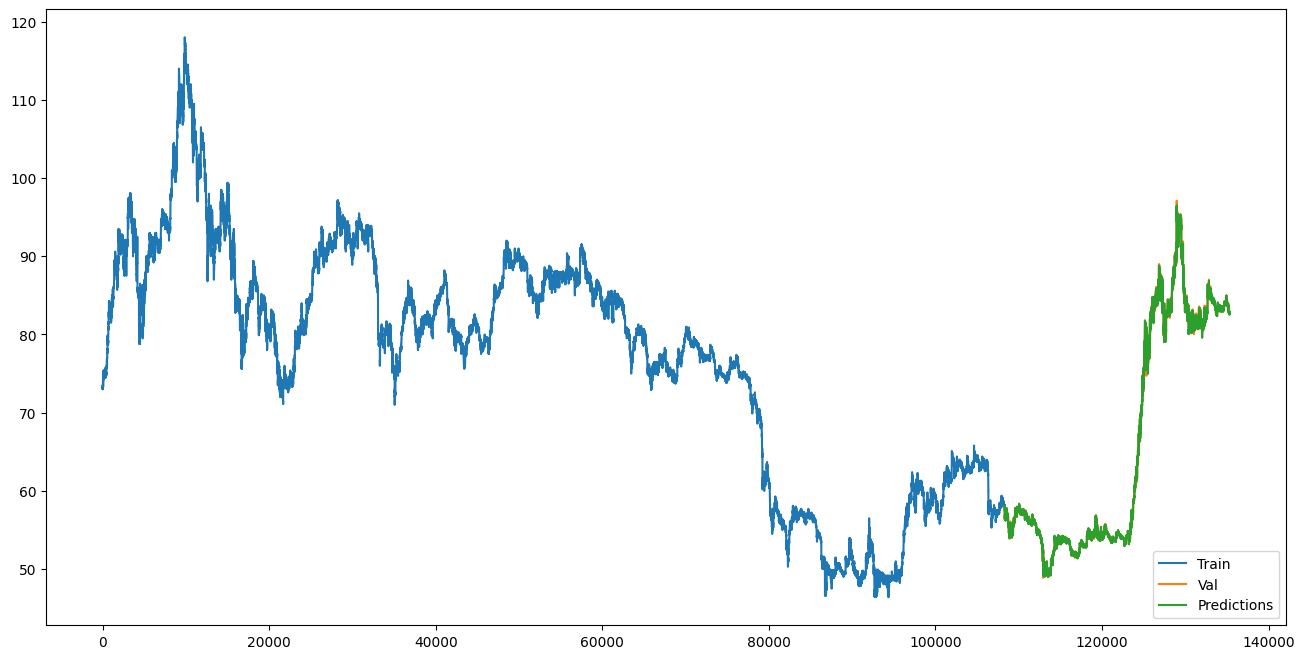

In [ ]:
LinearRegressionStockPrice(data=data_MSN)

<ipython-input-12-ec0bf73034a7>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_stock = data_stock.drop(['Ticker', 'Date/Time'], 1)
<ipython-input-12-ec0bf73034a7>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = data_train_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = data_test_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_stock['

total loss = 0.03520454892901963


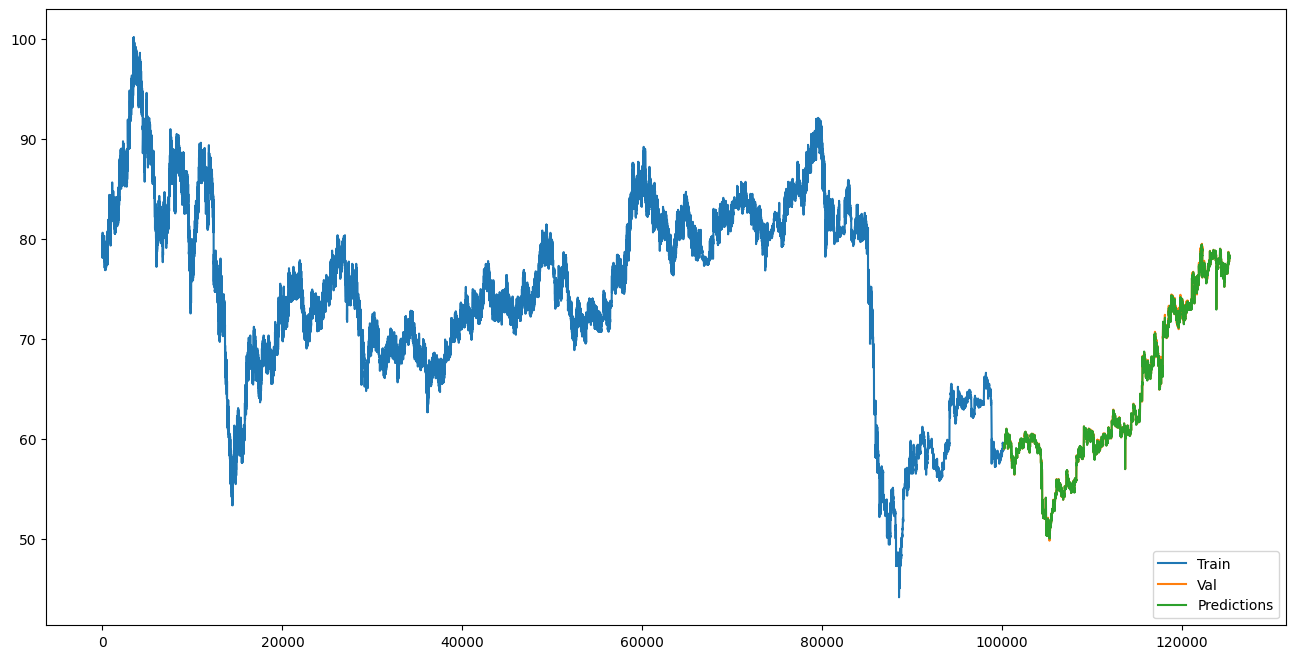

In [ ]:
LinearRegressionStockPrice(data=data_PNJ)

<ipython-input-12-ec0bf73034a7>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_stock = data_stock.drop(['Ticker', 'Date/Time'], 1)
<ipython-input-12-ec0bf73034a7>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = data_train_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = data_test_stock.drop(['Close'], 1)
<ipython-input-12-ec0bf73034a7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_stock['

total loss = 0.03765664909409703


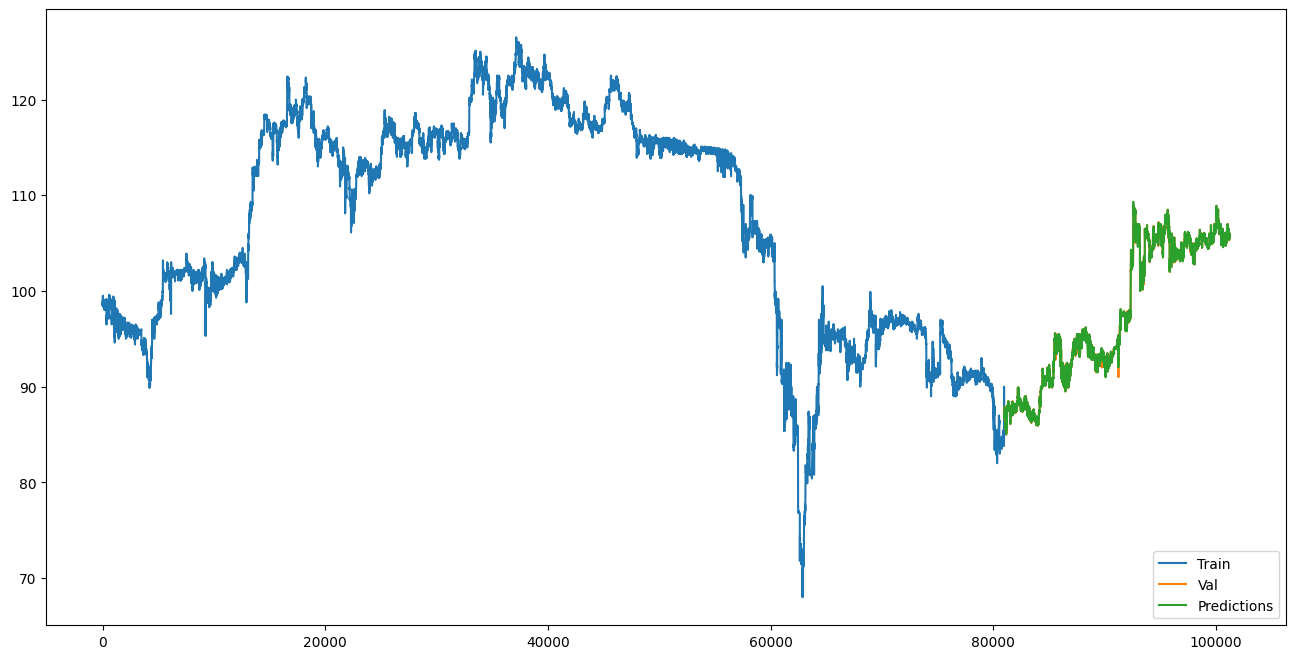

In [ ]:
LinearRegressionStockPrice(data=data_VIC)

#Prepare datafor LSTM model

In [ ]:
from copy import deepcopy
def prepare_dataframe_for_lstm(data_frame, n_steps):
  data_copy = deepcopy(data_frame)

  # data_copy.set_index('Date/Time', inplace=True)

  for i in range(1, n_steps + 1):
    data_copy[f'Close(t-{i})'] = data_copy['Close'].shift(i)

  data_copy.dropna(inplace=True)

  return data_copy
#'Date/Time','Open', 'High', 'Low', 'Volume'
lookback = 7
data_stock_FPT = prepare_dataframe_for_lstm(data_FPT[['Close']], lookback)
data_stock_MSN = prepare_dataframe_for_lstm(data_MSN[['Close']], lookback)
data_stock_PNJ = prepare_dataframe_for_lstm(data_PNJ[['Close']], lookback)
data_stock_VIC = prepare_dataframe_for_lstm(data_VIC[['Close']], lookback)

In [ ]:
data_stock_FPT

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
7,31.11,30.66,30.74,30.74,30.74,30.74,30.81,30.89
8,31.19,31.11,30.66,30.74,30.74,30.74,30.74,30.81
9,31.19,31.19,31.11,30.66,30.74,30.74,30.74,30.74
10,31.15,31.19,31.19,31.11,30.66,30.74,30.74,30.74
11,31.11,31.15,31.19,31.19,31.11,30.66,30.74,30.74
...,...,...,...,...,...,...,...,...
97401,58.20,58.20,58.10,58.10,58.10,58.10,58.10,58.10
97402,58.20,58.20,58.20,58.10,58.10,58.10,58.10,58.10
97403,58.20,58.20,58.20,58.20,58.10,58.10,58.10,58.10
97404,58.10,58.20,58.20,58.20,58.20,58.10,58.10,58.10


In [ ]:
data_stock_FPT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97399 entries, 7 to 97405
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       97399 non-null  float64
 1   Close(t-1)  97399 non-null  float64
 2   Close(t-2)  97399 non-null  float64
 3   Close(t-3)  97399 non-null  float64
 4   Close(t-4)  97399 non-null  float64
 5   Close(t-5)  97399 non-null  float64
 6   Close(t-6)  97399 non-null  float64
 7   Close(t-7)  97399 non-null  float64
dtypes: float64(8)
memory usage: 6.7 MB


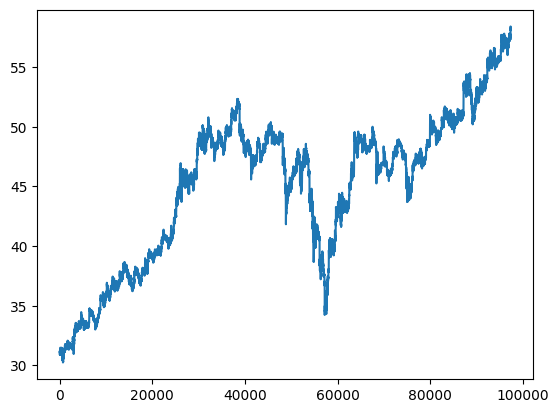

In [ ]:
# data_stock_FPT['Date/Time'] = pd.to_datetime(data_stock_FPT['Date/Time'])
plt.plot(data_stock_FPT['Close'])

In [ ]:
data_stock_FPT_as_numpy = data_stock_FPT.to_numpy()
data_stock_MSN_as_numpy = data_stock_MSN.to_numpy()
data_stock_PNJ_as_numpy = data_stock_PNJ.to_numpy()
data_stock_VIC_as_numpy = data_stock_VIC.to_numpy()

In [ ]:
# data_stock_FPT_as_numpy
print(data_stock_FPT_as_numpy)
print(data_stock_FPT_as_numpy.shape)

[[31.11 30.66 30.74 ... 30.74 30.81 30.89]
 [31.19 31.11 30.66 ... 30.74 30.74 30.81]
 [31.19 31.19 31.11 ... 30.74 30.74 30.74]
 ...
 [58.2  58.2  58.2  ... 58.1  58.1  58.1 ]
 [58.1  58.2  58.2  ... 58.1  58.1  58.1 ]
 [58.1  58.1  58.2  ... 58.2  58.1  58.1 ]]
(97399, 8)


In [ ]:
def split_data(split_index, X, y):

  X_train = X[:split_index]
  X_test = X[split_index:]

  y_train = y[:split_index]
  y_test = y[split_index:]

  return X_train, y_train, X_test, y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

data_stock_FPT_scale_as_numpy = scaler.fit_transform(data_stock_FPT_as_numpy)
data_stock_MSN_scale_as_numpy = scaler.fit_transform(data_stock_MSN_as_numpy)
data_stock_PNJ_scale_as_numpy = scaler.fit_transform(data_stock_PNJ_as_numpy)
data_stock_VIC_scale_as_numpy = scaler.fit_transform(data_stock_VIC_as_numpy)
# print(data_stock_FPT_scale_as_numpy)

# y is the first column is 'Close'
# stock FPT
X_stock_FPT = data_stock_FPT_scale_as_numpy[:, 1:]
y_stock_FPT = data_stock_FPT_scale_as_numpy[:, 0]

# stock MSN
X_stock_MSN = data_stock_MSN_scale_as_numpy[:, 1:]
y_stock_MSN = data_stock_MSN_scale_as_numpy[:, 0]

# stock PNJ
X_stock_PNJ = data_stock_PNJ_scale_as_numpy[:, 1:]
y_stock_PNJ = data_stock_PNJ_scale_as_numpy[:, 0]

# stock VIC
X_stock_VIC = data_stock_VIC_scale_as_numpy[:, 1:]
y_stock_VIC = data_stock_VIC_scale_as_numpy[:, 0]

print("X stock FPT : ", X_stock_FPT.shape)
print("y stock FPT : ", y_stock_FPT.shape)

# X_stock_FPT = deepcopy(np.flip(X_stock_FPT, axis=1))
# print(X_stock_FPT)
# print(X_stock_FPT.shape)

split_index_FPT = int(len(X_stock_FPT) * 0.8)
split_index_MSN = int(len(X_stock_MSN) * 0.8)
split_index_PNJ = int(len(X_stock_PNJ) * 0.8)
split_index_VIC = int(len(X_stock_VIC) * 0.8)

print("index split FPT : ", split_index_FPT)
print("index split MSN : ", split_index_MSN)
print("index split PNJ : ", split_index_PNJ)
print("index split VIC : ", split_index_VIC)




X stock FPT :  (97399, 7)
y stock FPT :  (97399,)
index split FPT :  77919
index split MSN :  108277
index split PNJ :  100241
index split VIC :  81007


In [ ]:
X_train_FPT, y_train_FPT, X_test_FPT, y_test_FPT = split_data(split_index = split_index_FPT, X = X_stock_FPT, y = y_stock_FPT)
X_train_MSN, y_train_MSN, X_test_MSN, y_test_MSN = split_data(split_index = split_index_MSN, X = X_stock_MSN, y = y_stock_MSN)
X_train_PNJ, y_train_PNJ, X_test_PNJ, y_test_PNJ = split_data(split_index = split_index_PNJ, X = X_stock_PNJ, y = y_stock_PNJ)
X_train_VIC, y_train_VIC, X_test_VIC, y_test_VIC = split_data(split_index = split_index_VIC, X = X_stock_VIC, y = y_stock_VIC)

print("X train stock FPT shape : ", X_train_FPT.shape)
print("y train stock FPT shape : ", y_train_FPT.shape)
print("X test stock FPT shape : ", X_test_FPT.shape)
print("y test stock FPT shape : ", y_test_FPT.shape)
print('-' * 20)
print("X train stock MSN shape : ", X_train_MSN.shape)
print("y train stock MSN shape : ", y_train_MSN.shape)
print("X test stock MSN shape : ", X_test_MSN.shape)
print("y test stock MSN shape : ", y_test_MSN.shape)
print('-' * 20)
print("X train stock PNJ shape : ", X_train_PNJ.shape)
print("y train stock PNJ shape : ", y_train_PNJ.shape)
print("X test stock PNJ shape : ", X_test_PNJ.shape)
print("y test stock PNJ shape : ", y_test_PNJ.shape)
print('-' * 20)
print("X train stock VIC shape : ", X_train_VIC.shape)
print("y train stock VIC shape : ", y_train_VIC.shape)
print("X test stock VIC shape : ", X_test_VIC.shape)
print("y test stock VIC shape : ", y_test_VIC.shape)



X train stock FPT shape :  (77919, 7)
y train stock FPT shape :  (77919,)
X test stock FPT shape :  (19480, 7)
y test stock FPT shape :  (19480,)
--------------------
X train stock MSN shape :  (108277, 7)
y train stock MSN shape :  (108277,)
X test stock MSN shape :  (27070, 7)
y test stock MSN shape :  (27070,)
--------------------
X train stock PNJ shape :  (100241, 7)
y train stock PNJ shape :  (100241,)
X test stock PNJ shape :  (25061, 7)
y test stock PNJ shape :  (25061,)
--------------------
X train stock VIC shape :  (81007, 7)
y train stock VIC shape :  (81007,)
X test stock VIC shape :  (20252, 7)
y test stock VIC shape :  (20252,)


#Create tensor dataset

In [ ]:
def reshape_data(data_X_train, data_y_train, data_X_test, data_y_test):
  X_train = deepcopy(data_X_train.reshape((-1, lookback, 1)))
  X_test = deepcopy(data_X_test.reshape((-1, lookback, 1)))

  y_train = deepcopy(data_y_train.reshape((-1, 1)))
  y_test = deepcopy(data_y_test.reshape((-1, 1)))

  return X_train, y_train, X_test, y_test

def data_to_tensor(X_train, y_train, X_test, y_test):

  X_train = torch.tensor(X_train).float()
  y_train = torch.tensor(y_train).float()
  X_test = torch.tensor(X_test).float()
  y_test = torch.tensor(y_test).float()

  return X_train, y_train, X_test, y_test

In [ ]:
X_train_FPT, y_train_FPT, X_test_FPT, y_test_FPT = reshape_data(X_train_FPT, y_train_FPT, X_test_FPT, y_test_FPT)
X_train_MSN, y_train_MSN, X_test_MSN, y_test_MSN = reshape_data(X_train_MSN, y_train_MSN, X_test_MSN, y_test_MSN)
X_train_PNJ, y_train_PNJ, X_test_PNJ, y_test_PNJ = reshape_data(X_train_PNJ, y_train_PNJ, X_test_PNJ, y_test_PNJ)
X_train_VIC, y_train_VIC, X_test_VIC, y_test_VIC = reshape_data(X_train_VIC, y_train_VIC, X_test_VIC, y_test_VIC)

X_train_FPT, y_train_FPT, X_test_FPT, y_test_FPT = data_to_tensor(X_train = X_train_FPT, y_train = y_train_FPT, X_test = X_test_FPT, y_test = y_test_FPT)
X_train_MSN, y_train_MSN, X_test_MSN, y_test_MSN = data_to_tensor(X_train = X_train_MSN, y_train = y_train_MSN, X_test = X_test_MSN, y_test = y_test_MSN)
X_train_PNJ, y_train_PNJ, X_test_PNJ, y_test_PNJ = data_to_tensor(X_train = X_train_PNJ, y_train = y_train_PNJ, X_test = X_test_PNJ, y_test = y_test_PNJ)
X_train_VIC, y_train_VIC, X_test_VIC, y_test_VIC = data_to_tensor(X_train = X_train_VIC, y_train = y_train_VIC, X_test = X_test_VIC, y_test = y_test_VIC)


In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, i):
    return self.X[i], self.y[i]

# Create dataloader

In [ ]:
def create_dataloader(X_train, y_train, X_test, y_test, batch_size = 32):
  train_dataset = TimeSeriesDataset(X_train, y_train)
  test_dataset = TimeSeriesDataset(X_test, y_test)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  return train_loader, test_loader

In [ ]:
train_dataloader_FPT, test_dataloader_FPT = create_dataloader(X_train = X_train_FPT, y_train = y_train_FPT, X_test = X_test_FPT, y_test = y_test_FPT, batch_size = 32)
train_dataloader_MSN, test_dataloader_MSN = create_dataloader(X_train = X_train_MSN, y_train = y_train_MSN, X_test = X_test_MSN, y_test = y_test_MSN, batch_size = 32)
train_dataloader_PNJ, test_dataloader_PNJ = create_dataloader(X_train = X_train_PNJ, y_train = y_train_PNJ, X_test = X_test_PNJ, y_test = y_test_PNJ, batch_size = 32)
train_dataloader_VIC, test_dataloader_VIC = create_dataloader(X_train = X_train_VIC, y_train = y_train_VIC, X_test = X_test_VIC, y_test = y_test_VIC, batch_size = 32)

# Prepare model train data

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers

    self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

    out, _ = self.lstm(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out

In [ ]:
def train_one_epoch(epoch, train_loader, loss_function, optimizer, model):
  model.train(True)
  print(f'Epoch: {epoch + 1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    output = model(x_batch)
    loss = loss_function(output, y_batch)
    running_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index % 1000 == 999:  # print every 1000 batches
      avg_loss_across_batches = running_loss / 1000
      print('Batch {0}, Loss: {1:.8f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
      running_loss = 0.0
  print()

def validate_one_epoch(epoch, test_loader, loss_function, optimizer, model):
  model.train(False)
  running_loss = 0.0

  for batch_index, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
      output = model(x_batch)
      loss = loss_function(output, y_batch)
      running_loss += loss.item()

  avg_loss_across_batches = running_loss / len(test_loader)

  print('Val Loss: {0:.8f}'.format(avg_loss_across_batches))
  print('***************************************************')
  print()

In [ ]:
def train_and_valid_model(train_loader, test_loader):
  learning_rate = 0.001
  num_epochs = 8
  model = LSTM(input_size = 1, hidden_size = 4, num_stacked_layers = 3)
  model.to(device)
  print(model)

  loss_function = nn.MSELoss()
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

  for epoch in range(num_epochs):
    train_one_epoch(epoch = epoch, train_loader = train_loader, loss_function = loss_function, optimizer = optimizer, model = model)
    validate_one_epoch(epoch = epoch, test_loader = test_loader, loss_function = loss_function, optimizer = optimizer, model = model)

  return model

#Train model LSTM for FPT

In [ ]:
model_FPT = train_and_valid_model(train_loader = train_dataloader_FPT, test_loader = test_dataloader_FPT)

LSTM(
  (lstm): LSTM(1, 4, num_layers=3, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1
Batch 1000, Loss: 0.02301951
Batch 2000, Loss: 0.00009769

Val Loss: 0.01604617
***************************************************

Epoch: 2
Batch 1000, Loss: 0.00006983
Batch 2000, Loss: 0.00006233

Val Loss: 0.01090527
***************************************************

Epoch: 3
Batch 1000, Loss: 0.00005641
Batch 2000, Loss: 0.00005438

Val Loss: 0.00944180
***************************************************

Epoch: 4
Batch 1000, Loss: 0.00004961
Batch 2000, Loss: 0.00005587

Val Loss: 0.00922396
***************************************************

Epoch: 5
Batch 1000, Loss: 0.00004807
Batch 2000, Loss: 0.00004875

Val Loss: 0.00919780
***************************************************

Epoch: 6
Batch 1000, Loss: 0.00004562
Batch 2000, Loss: 0.00004936

Val Loss: 0.00968303
***************************************************

Epoch: 7
Batch 1000, Loss: 0.0

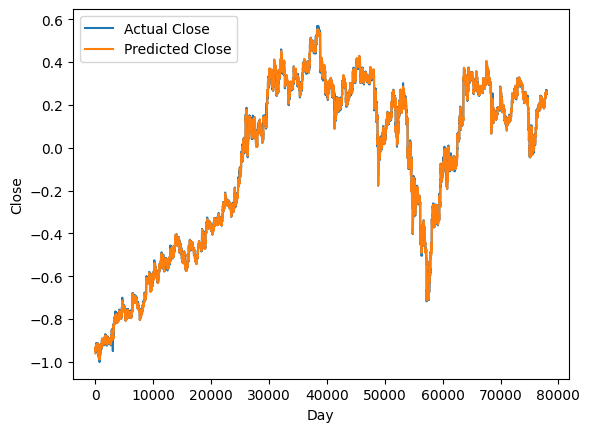

In [ ]:
with torch.no_grad():
  predicted = model_FPT(X_train_FPT.to(device)).to('cpu').numpy()

plt.plot(y_train_FPT, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model_FPT(X_test_FPT.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test_FPT.shape[0], lookback +1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = deepcopy(dummies[:, 0])
print("test prediction : ", test_predictions)

dummies = np.zeros((X_test_FPT.shape[0], lookback +1))
dummies[:, 0] = y_test_FPT.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = deepcopy(dummies[:, 0])
print("New y test : ", new_y_test)

test prediction :  [105.00966776 105.05687652 105.08928176 ... 116.9025024  116.9042162
 116.90100828]
New y test :  [105.09502638 105.09502638 105.19893429 ... 126.08437012 125.87655431
 125.87655431]


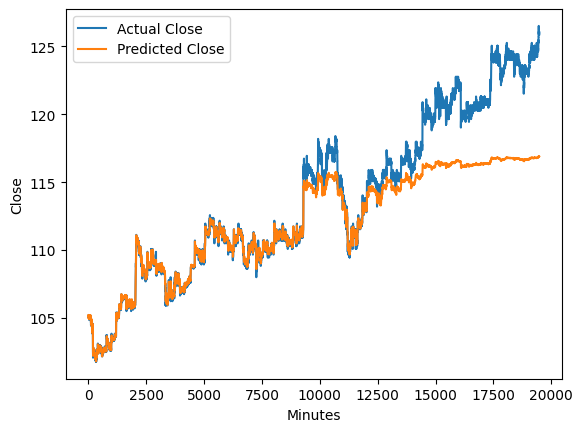

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Minutes')
plt.ylabel('Close')
plt.legend()
plt.show()

#Train model LSTM for MSN

In [ ]:
model_MSN = train_and_valid_model(train_loader = train_dataloader_MSN, test_loader = test_dataloader_MSN)

LSTM(
  (lstm): LSTM(1, 4, num_layers=3, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1
Batch 1000, Loss: 0.03205065
Batch 2000, Loss: 0.00011687
Batch 3000, Loss: 0.00008521

Val Loss: 0.00007209
***************************************************

Epoch: 2
Batch 1000, Loss: 0.00007201
Batch 2000, Loss: 0.00006597
Batch 3000, Loss: 0.00006284

Val Loss: 0.00006588
***************************************************

Epoch: 3
Batch 1000, Loss: 0.00006142
Batch 2000, Loss: 0.00005896
Batch 3000, Loss: 0.00006004

Val Loss: 0.00007310
***************************************************

Epoch: 4
Batch 1000, Loss: 0.00005696
Batch 2000, Loss: 0.00005472
Batch 3000, Loss: 0.00005976

Val Loss: 0.00014881
***************************************************

Epoch: 5
Batch 1000, Loss: 0.00005550
Batch 2000, Loss: 0.00005660
Batch 3000, Loss: 0.00005738

Val Loss: 0.00006767
***************************************************

Epoch: 6
Batch 1000, Loss: 

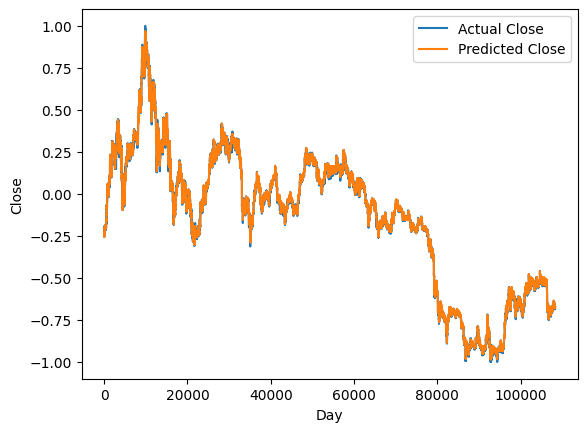

In [ ]:
with torch.no_grad():
  predicted = model_MSN(X_train_MSN.to(device)).to('cpu').numpy()

plt.plot(y_train_MSN, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model_MSN(X_test_MSN.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test_MSN.shape[0], lookback +1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = deepcopy(dummies[:, 0])
print("test prediction : ", test_predictions)

dummies = np.zeros((X_test_MSN.shape[0], lookback +1))
dummies[:, 0] = y_test_MSN.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = deepcopy(dummies[:, 0])
print("New y test : ", new_y_test)

test prediction :  [77.60909668 77.59805724 77.58888677 ... 97.78623903 97.78864671
 97.78979041]
New y test :  [77.47765382 77.47765382 77.39594944 ... 97.74022349 97.74022349
 97.74022349]


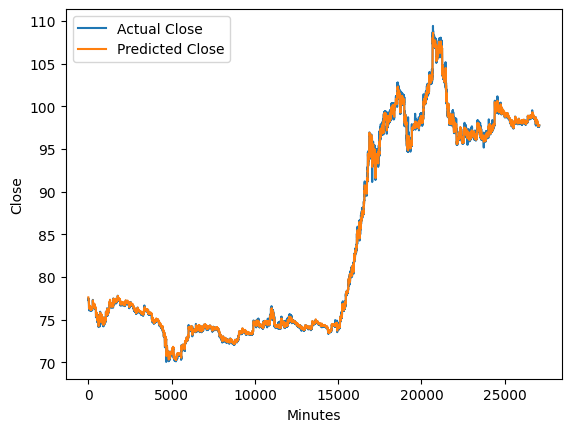

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Minutes')
plt.ylabel('Close')
plt.legend()
plt.show()

#Train model LSTM for PNJ

In [ ]:
model_PNJ = train_and_valid_model(train_loader = train_dataloader_PNJ, test_loader = test_dataloader_PNJ)

LSTM(
  (lstm): LSTM(1, 4, num_layers=3, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1
Batch 1000, Loss: 0.03056411
Batch 2000, Loss: 0.00062177
Batch 3000, Loss: 0.00054403

Val Loss: 0.00004580
***************************************************

Epoch: 2
Batch 1000, Loss: 0.00051892
Batch 2000, Loss: 0.00051780
Batch 3000, Loss: 0.00052936

Val Loss: 0.00024581
***************************************************

Epoch: 3
Batch 1000, Loss: 0.00053138
Batch 2000, Loss: 0.00052713
Batch 3000, Loss: 0.00052239

Val Loss: 0.00007223
***************************************************

Epoch: 4
Batch 1000, Loss: 0.00051889
Batch 2000, Loss: 0.00051590
Batch 3000, Loss: 0.00053182

Val Loss: 0.00013484
***************************************************

Epoch: 5
Batch 1000, Loss: 0.00051285
Batch 2000, Loss: 0.00051756
Batch 3000, Loss: 0.00051827

Val Loss: 0.00016249
***************************************************

Epoch: 6
Batch 1000, Loss: 

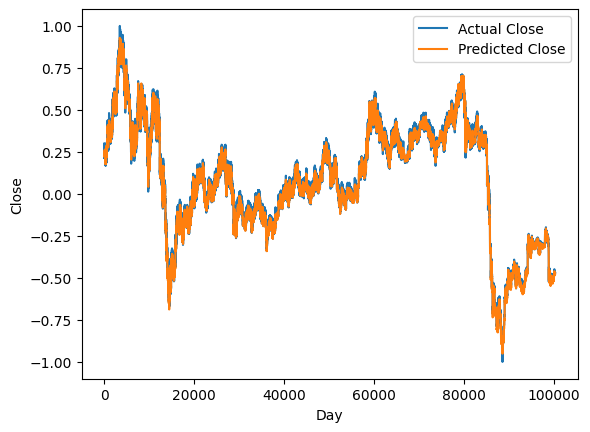

In [ ]:
with torch.no_grad():
  predicted = model_PNJ(X_train_PNJ.to(device)).to('cpu').numpy()

plt.plot(y_train_PNJ, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model_PNJ(X_test_PNJ.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test_PNJ.shape[0], lookback + 1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = deepcopy(dummies[:, 0])
print("test prediction : ", test_predictions)

dummies = np.zeros((X_test_PNJ.shape[0], lookback + 1))
dummies[:, 0] = y_test_PNJ.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = deepcopy(dummies[:, 0])
print("New y test : ", new_y_test)

test prediction :  [ 83.24680337  83.24535632  83.26231995 ... 103.76974925 103.76703734
 103.7451825 ]
New y test :  [ 83.51785099  83.62227757  84.03998562 ... 103.56783279 103.46340578
 103.67225981]


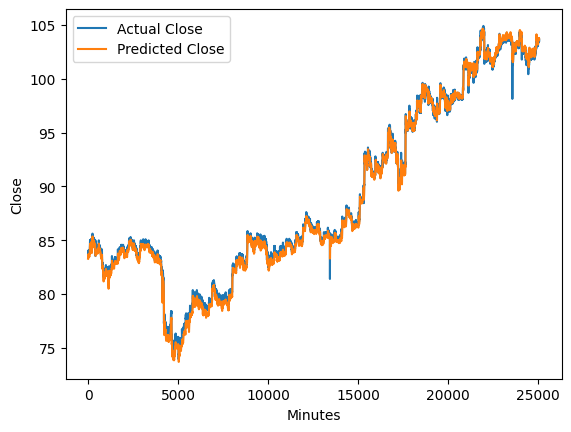

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Minutes')
plt.ylabel('Close')
plt.legend()
plt.show()

#Train model LSTM for VIC

In [ ]:
model_VIC = train_and_valid_model(train_loader = train_dataloader_VIC, test_loader = test_dataloader_VIC)

LSTM(
  (lstm): LSTM(1, 4, num_layers=3, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Epoch: 1
Batch 1000, Loss: 0.02659076
Batch 2000, Loss: 0.00022187

Val Loss: 0.00014880
***************************************************

Epoch: 2
Batch 1000, Loss: 0.00010186
Batch 2000, Loss: 0.00008660

Val Loss: 0.00012411
***************************************************

Epoch: 3
Batch 1000, Loss: 0.00007318
Batch 2000, Loss: 0.00006203

Val Loss: 0.00006777
***************************************************

Epoch: 4
Batch 1000, Loss: 0.00005873
Batch 2000, Loss: 0.00005231

Val Loss: 0.00003448
***************************************************

Epoch: 5
Batch 1000, Loss: 0.00004981
Batch 2000, Loss: 0.00005765

Val Loss: 0.00004348
***************************************************

Epoch: 6
Batch 1000, Loss: 0.00004571
Batch 2000, Loss: 0.00005749

Val Loss: 0.00015124
***************************************************

Epoch: 7
Batch 1000, Loss: 0.0

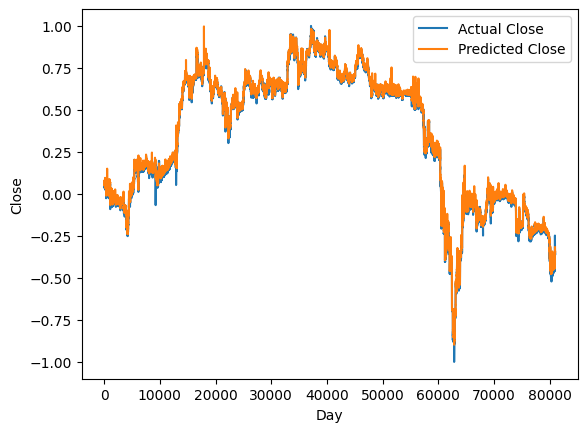

In [ ]:
with torch.no_grad():
  predicted = model_VIC(X_train_VIC.to(device)).to('cpu').numpy()

plt.plot(y_train_VIC, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model_VIC(X_test_VIC.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test_VIC.shape[0], lookback +1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = deepcopy(dummies[:, 0])
print("test prediction : ", test_predictions)

dummies = np.zeros((X_test_VIC.shape[0], lookback +1))
dummies[:, 0] = y_test_VIC.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = deepcopy(dummies[:, 0])
print("New y test : ", new_y_test)

test prediction :  [ 87.29017459  87.21101999  87.15136223 ... 105.97721452 105.94945553
 105.94152638]
New y test :  [ 86.79999975  86.79999975  86.69999976 ... 105.70000037 105.70000037
 105.70000037]


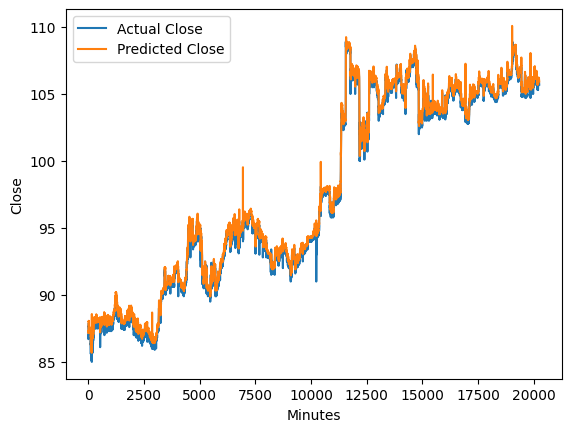

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Minutes')
plt.ylabel('Close')
plt.legend()
plt.show()

#ARIMA

In [ ]:
def split_data_for_ARIMA(split_index, data):
  # stock = deepcopy(data)

  # not useful
  column_X = ['Date/Time', 'Open', 'High', 'Low', 'Volume']
  column_y = ['Close']

  X_stock = data[column_X]
  y_stock = data[column_y]

  X_train = X_stock[0:split_index]
  y_train = y_stock[0:split_index]

  X_test = X_stock[split_index:]
  y_test = y_stock[split_index:]

  #
  data_copy = deepcopy(data)
  split_index = int(len(data) * 0.8)
  train = data_copy[:split_index]
  test = data_copy[split_index:]
  return train, test


In [ ]:
data_FPT

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [ ]:
def train_ARIMA(data):
  series = data['Close']
  X = series.values

  size = len(X) - 200

  train, test = X[0:size], X[size:len(X)-1]
  history = [x for x in train]

  predictions = list()

  model = ARIMA(train, order=(1, 1, 0))
  yhat = model.fit().forecast()[0]
  # predictions.append(yhat)
  history.append(test[0])

  for t in range(len(test)):
    if (t % 10 == 9):
      print(t)
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

  plt.plot(test, label='Actual')
  plt.plot(predictions, label='Predicted')
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
  plt.title('ARIMA Stock Prediction')
  plt.legend()
  plt.show()


9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189


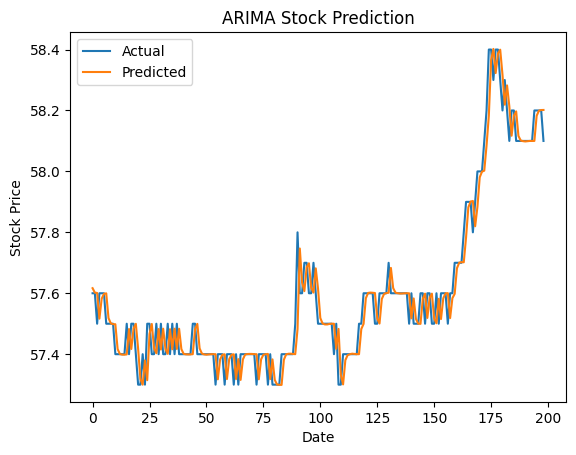

In [ ]:
train_ARIMA(data=data_FPT)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9
19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


29


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


39


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


49


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


59


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


69


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


79


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


89


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


99


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


109


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

119


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


159


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

169


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


179


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


189


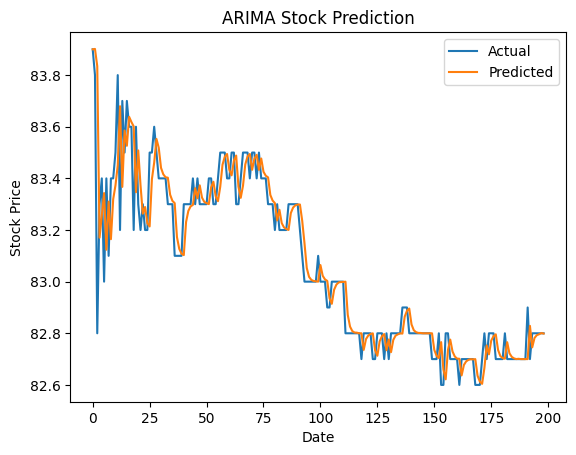

In [39]:
train_ARIMA(data=data_MSN)

9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189


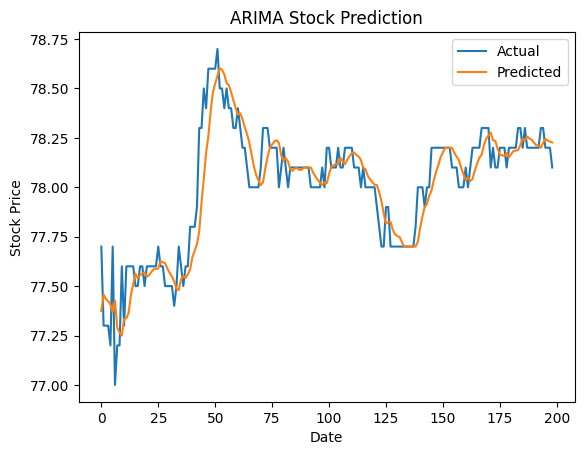

In [ ]:
train_ARIMA(data=data_PNJ)


9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189


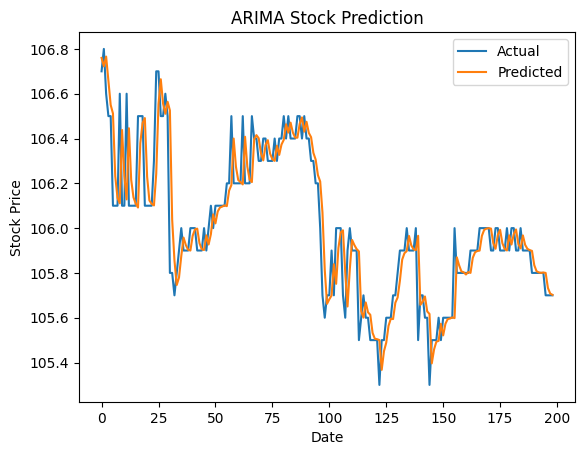

In [38]:
train_ARIMA(data=data_VIC)